Logs 
- [2025/10/08]    
  In `miniconda3/Lib/site-packages/upsetplot/plotting.py`, we changed 
  in line 795-798 to use modern version of updating value in Pandas 3.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from upsetplot import UpSet, plot

In [5]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
  'font.size': 16,
  'grid.alpha': 0.25})

In [24]:
tuples = []
for member1 in [False, True]:
  for member2 in [False, True]:
    for member3 in [False, True]:
      tuples.append((member1, member2, member3))
display(tuples)

index = pd.MultiIndex.from_tuples(tuples, names=["B", "C", "A"])
display(index)

# Example from wiki: https://en.wikipedia.org/wiki/File:UpSet_Plot_and_a_Corresponding_Venn_Diagram.svg
s = pd.Series([5, 17, 7, 10, 14, 20, 7, 5], index=index)
s


[(False, False, False),
 (False, False, True),
 (False, True, False),
 (False, True, True),
 (True, False, False),
 (True, False, True),
 (True, True, False),
 (True, True, True)]

MultiIndex([(False, False, False),
            (False, False,  True),
            (False,  True, False),
            (False,  True,  True),
            ( True, False, False),
            ( True, False,  True),
            ( True,  True, False),
            ( True,  True,  True)],
           names=['B', 'C', 'A'])

B      C      A    
False  False  False     5
              True     17
       True   False     7
              True     10
True   False  False    14
              True     20
       True   False     7
              True      5
dtype: int64

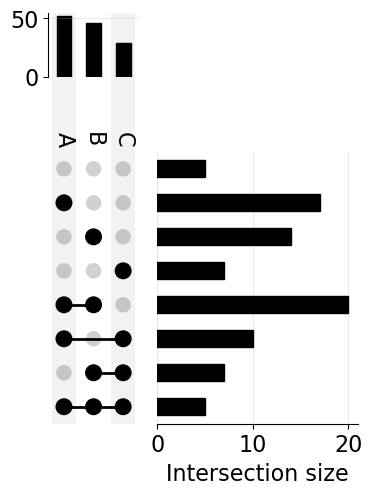

In [ ]:
fig, ax = plt.subplots()
ax_dict = plot_matrix(s, fig=fig, orientation="vertical")

ax.axis(False)
plt.show(fig)

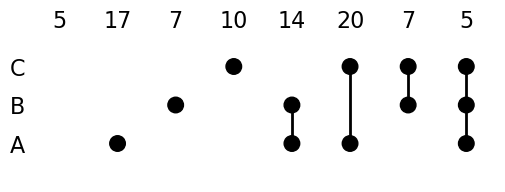

In [74]:
fig, ax = plt.subplots(figsize=(6, 2))
upset_handler = UpSet(s, other_dots_color="None")
upset_handler.plot_matrix(ax)

for idx, val in enumerate(s.values):
  ax.text(idx, 3, f"{val}", ha="center")

ax.set_ylim([-1, 3])
plt.show(fig)

In [65]:
chr(65)

'A'

In [69]:
seed = 25_10_08
rng = np.random.default_rng(seed)

n_sets = 7
n = rng.integers(3, 20, n_sets)
n_elems = 5
for i in range(n_sets):
  elem_i = rng.integers(0, 2, n[i])
  str_elems = ", ".join(list(map(str, elem_i)))
  print(f"${chr(65+i)} = {{{str_elems}}}$")


$A = {0, 0, 0, 0, 1, 0, 0}$
$B = {1, 1, 0, 1, 1, 1, 0}$
$C = {1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1}$
$D = {1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0}$
$E = {0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1}$
$F = {0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0}$
$G = {1, 1, 0, 0, 1, 1, 1}$
